CNN (MNIST 手寫數字辨識資料集)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from keras import Model
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
import matplotlib.pyplot as plt
import random


In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [ ]:
# normalization 
train_x = train_x / 255.0
test_x = test_x / 255.0

print("\nTrain Test Dimensions:\n------------------------------------")
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)


Train Test Dimensions:
------------------------------------
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


label: 6


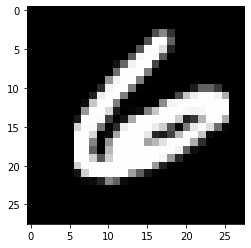

In [ ]:
# random plot one image from training data

number = random.randint(0, 60000)
plt.imshow(train_x[number], cmap='gray')
print("label:",train_y[number])

In [ ]:
# build model 
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3, 3), name = 'conv_1',activation='relu', input_shape=(28,28,1)))
model.add(AveragePooling2D(name='pool_1'))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu',name='conv_2'))
model.add(AveragePooling2D(name='pool_2'))
model.add(Flatten(name='flatten'))
model.add(Dense(128, activation='relu',name='fc_1'))
model.add(Dense(10, activation = 'softmax',name='fc_2'))

# compile model
model.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

# show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 26, 26, 6)         60        
                                                                 
 pool_1 (AveragePooling2D)   (None, 13, 13, 6)         0         
                                                                 
 conv_2 (Conv2D)             (None, 11, 11, 16)        880       
                                                                 
 pool_2 (AveragePooling2D)   (None, 5, 5, 16)          0         
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 fc_1 (Dense)                (None, 128)               51328     
                                                                 
 fc_2 (Dense)                (None, 10)                1

In [ ]:
# training model
history = model.fit(train_x, train_y, batch_size=8, epochs=50, validation_split=0.2,shuffle=True)

Epoch 1/50
6000/6000 [==============================] - 54s 9ms/step - loss: 0.1829 - accuracy: 0.9445 - val_loss: 0.0902 - val_accuracy: 0.9732
Epoch 2/50
6000/6000 [==============================] - 46s 8ms/step - loss: 0.0673 - accuracy: 0.9788 - val_loss: 0.0589 - val_accuracy: 0.9830
Epoch 3/50
6000/6000 [==============================] - 43s 7ms/step - loss: 0.0460 - accuracy: 0.9858 - val_loss: 0.0521 - val_accuracy: 0.9845
Epoch 4/50
6000/6000 [==============================] - 42s 7ms/step - loss: 0.0359 - accuracy: 0.9894 - val_loss: 0.0467 - val_accuracy: 0.9877
Epoch 5/50
6000/6000 [==============================] - 48s 8ms/step - loss: 0.0272 - accuracy: 0.9910 - val_loss: 0.0514 - val_accuracy: 0.9846
Epoch 6/50
6000/6000 [==============================] - 44s 7ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0505 - val_accuracy: 0.9870
Epoch 7/50
6000/6000 [==============================] - 40s 7ms/step - loss: 0.0173 - accuracy: 0.9943 - val_loss: 0.0536 - val_ac

keys in history: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


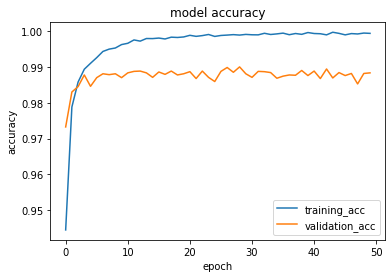

In [ ]:
print('keys in history:', history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training_acc', 'validation_acc'], loc='lower right')
plt.show()

In [ ]:
# use testing data to evaluate model 
score = model.evaluate(test_x, test_y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 8ms/step - loss: 0.1191 - accuracy: 0.9887
Test loss: 0.1191277801990509
Test accuracy: 0.9886999726295471


In [ ]:
# save model 
model.save('drive/MyDrive/Colab Notebooks/CNN.h5')

In [ ]:
# load model
model = keras.models.load_model('drive/MyDrive/Colab Notebooks/CNN.h5')
score = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1191277801990509
Test accuracy: 0.9886999726295471


In [ ]:
# random choose one image from testing data

i = random.randrange(0, len(test_x), 1)
test_input = test_x[i]
test_output = test_y[i]

test_img = np.expand_dims(test_input, 0)
predict_output = model.predict(test_img)
print(predict_output)

[[0.0000000e+00 9.9304770e-30 0.0000000e+00 1.0000000e+00 0.0000000e+00
  3.9966685e-35 0.0000000e+00 3.3488037e-22 0.0000000e+00 1.3904038e-29]]


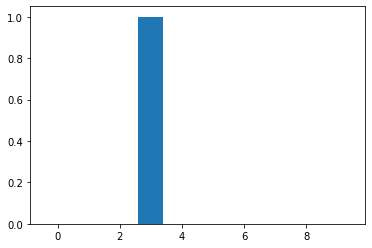

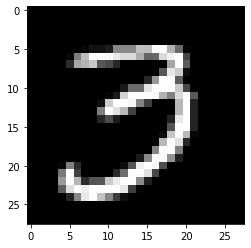

real answer: 3
predict answer: 3


In [ ]:
max = np.argmax(predict_output[0])

label = np.arange(start=0, stop=10, step=1)

plt.bar(label, height = predict_output[0], align='center')
plt.show()

plt.imshow(test_input, cmap = 'gray')
plt.show()

print("real answer:", test_output )
print("predict answer:", max )
